In [1]:
import os
from PIL import Image, ImageOps
from google.colab import drive
from collections import Counter
import json
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import random
import cv2
import numpy as np
import tqdm

# Resize images

We need consistent image sizes, and in some cases square images.

First we resize all images to 2048x1024.  The raw data has aspect ratio around 2.2:1.  This resize at 2:1 is close to the raw aspect ratio, but better fits models that run more efficiently on binary sizes.

Then we add blank padding to these images get squares at 2048x2048.  The square size is necessary for some models like YOLO.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# verify data
%ls drive/MyDrive/training_data/quadrant_enumeration/

200e_dental_teeth_yolov8.pt               masks_teeth_2048_2048_class_weights.json
bb_unet_maskrcnn.pth                      models/
coco_quadrant_enumeration_2048_1024.json  sample/
coco_quadrant_enumeration_2048_2048.json  test_unet.pth
dental_maskrcnn.pth                       train_quadrant_enumeration.json
dental_teeth_yolov8.pt                    unet_actuals.json
explore_unet_class_fix.pth                unet_predictions.json
explore_unet.pth                          xrays/
maskrcnn_predictions.json                 xrays_2048_1024/
maskrcnn_unet_actuals.json                xrays_2048_2048/
masks_teeth_2048_1024/                    yolo_2048_2048/
masks_teeth_2048_1024_class_weights.json  yolo_bbunet.pt
masks_teeth_2048_2048/


In [4]:
# verify data
%ls drive/MyDrive/training_data/quadrant-enumeration-disease/

coco_quadrant_enumeration_disease_2048_1024.json  xrays/            yolo_2048_2048/
coco_quadrant_enumeration_disease_2048_2048.json  xrays_2048_1024/
train_quadrant_enumeration_disease.json           xrays_2048_2048/


In [ ]:
# Function to resize the images with distorion

def resize_and_save(source_dir, output_dir, output_width, output_height):
    """
    Resize images in the source directory and save them to the output directory.

    Args:
        source_dir (str): Directory containing source images.
        output_dir (str): Directory to save resized images.
        output_width (int): Width of the resized images.
        output_height (int): Height of the resized images.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Loop through all files in the source directory
    for file_name in os.listdir(source_dir):
        if file_name.endswith(".png"):  # Process only .png files
            source_path = os.path.join(source_dir, file_name)
            output_path = os.path.join(output_dir, file_name)

            try:
                # Open the image and resize
                with Image.open(source_path) as img:
                    resized_img = img.resize((output_width, output_height), Image.Resampling.LANCZOS)
                    resized_img.save(output_path)
                print(f"Resized and saved: {file_name}")
            except Exception as e:
                print(f"Failed to process {file_name}: {e}")


In [ ]:
# function to count images by size, used to verify resize results

def get_image_size_counts(image_dir):
    """Count the number of images for each size in a directory."""
    size_counts = Counter()

    for file_name in os.listdir(image_dir):
        if file_name.endswith(".png"):  # Ensure only PNG files are processed
            image_path = os.path.join(image_dir, file_name)
            with Image.open(image_path) as img:
                size_counts[img.size] += 1  # Count occurrences of each size (width, height)

    return size_counts

In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Resize images

#### quadrant directory

# source_dir = "drive/MyDrive/training_data/quadrant/xrays"
# output_dir = "drive/MyDrive/training_data/quadrant/xrays_2048_1024"
# resize_and_save(source_dir, output_dir, 2048, 1024)

Resized and saved: train_1.png
Resized and saved: train_0.png
Resized and saved: train_100.png
Resized and saved: train_103.png
Resized and saved: train_10.png
Resized and saved: train_101.png
Resized and saved: train_102.png
Resized and saved: train_108.png
Resized and saved: train_106.png
Resized and saved: train_104.png
Resized and saved: train_107.png
Resized and saved: train_105.png
Resized and saved: train_112.png
Resized and saved: train_110.png
Resized and saved: train_109.png
Resized and saved: train_11.png
Resized and saved: train_111.png
Resized and saved: train_115.png
Resized and saved: train_116.png
Resized and saved: train_114.png
Resized and saved: train_113.png
Resized and saved: train_117.png
Resized and saved: train_119.png
Resized and saved: train_118.png
Resized and saved: train_122.png
Resized and saved: train_120.png
Resized and saved: train_12.png
Resized and saved: train_121.png
Resized and saved: train_126.png
Resized and saved: train_124.png
Resized and saved

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant/xrays_2048_1024"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 1024): 693 images


In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Resize images

#### quadrant_enumeration directory

# source_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays"
# output_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_1024"
# resize_and_save(source_dir, output_dir, 2048, 1024)

Resized and saved: train_10.png
Resized and saved: train_1.png
Resized and saved: train_0.png
Resized and saved: train_101.png
Resized and saved: train_103.png
Resized and saved: train_104.png
Resized and saved: train_100.png
Resized and saved: train_102.png
Resized and saved: train_108.png
Resized and saved: train_11.png
Resized and saved: train_107.png
Resized and saved: train_105.png
Resized and saved: train_106.png
Resized and saved: train_109.png
Resized and saved: train_113.png
Resized and saved: train_115.png
Resized and saved: train_112.png
Resized and saved: train_111.png
Resized and saved: train_110.png
Resized and saved: train_114.png
Resized and saved: train_116.png
Resized and saved: train_118.png
Resized and saved: train_117.png
Resized and saved: train_119.png
Resized and saved: train_12.png
Resized and saved: train_122.png
Resized and saved: train_121.png
Resized and saved: train_124.png
Resized and saved: train_123.png
Resized and saved: train_120.png
Resized and saved

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_1024"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 1024): 634 images


In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Resize images

#### quadrant-enumeration-disease directory

# source_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays"
# output_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_1024"
# resize_and_save(source_dir, output_dir, 2048, 1024)

Resized and saved: train_100.png
Resized and saved: train_1.png
Resized and saved: train_0.png
Resized and saved: train_10.png
Resized and saved: train_101.png
Resized and saved: train_102.png
Resized and saved: train_105.png
Resized and saved: train_103.png
Resized and saved: train_104.png
Resized and saved: train_108.png
Resized and saved: train_109.png
Resized and saved: train_106.png
Resized and saved: train_107.png
Resized and saved: train_11.png
Resized and saved: train_113.png
Resized and saved: train_114.png
Resized and saved: train_110.png
Resized and saved: train_112.png
Resized and saved: train_111.png
Resized and saved: train_116.png
Resized and saved: train_118.png
Resized and saved: train_117.png
Resized and saved: train_115.png
Resized and saved: train_12.png
Resized and saved: train_120.png
Resized and saved: train_119.png
Resized and saved: train_121.png
Resized and saved: train_122.png
Resized and saved: train_126.png
Resized and saved: train_124.png
Resized and saved

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_1024"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 1024): 705 images


# Create New COCO formatted JSON file for 2048x1024 images

In [ ]:

# # function to create new JSON file in coco format
# def transform_to_coco(input_json, output_json, new_size):
#     """
#     Transform raw JSON data into COCO format for resized images.

#     Args:
#         input_json (str): Path to the input JSON file.
#         output_json (str): Path to save the transformed JSON file.
#         new_size (tuple): Resized image dimensions (width, height).
#     """
#     with open(input_json, "r") as f:
#         data = json.load(f)

#     # Create a dictionary to map image_id to original dimensions
#     image_sizes = {image["id"]: (image["width"], image["height"]) for image in data["images"]}

#     # Transform annotations
#     for annotation in data["annotations"]:
#         # Get the original size for this annotation's image
#         orig_width, orig_height = image_sizes[annotation["image_id"]]

#         # Compute scaling factors
#         scale_x = new_size[0] / orig_width
#         scale_y = new_size[1] / orig_height

#         # Update bounding box
#         if "bbox" in annotation:
#             bbox = annotation["bbox"]
#             annotation["bbox"] = [
#                 bbox[0] * scale_x,
#                 bbox[1] * scale_y,
#                 bbox[2] * scale_x,
#                 bbox[3] * scale_y
#             ]

#         # Update segmentation
#         if "segmentation" in annotation:
#             annotation["segmentation"] = [
#                 [
#                     coord * scale_x if i % 2 == 0 else coord * scale_y
#                     for i, coord in enumerate(segment)
#                 ]
#                 for segment in annotation["segmentation"]
#             ]

#         # Update FDI tooth ID
#         category_id_1 = annotation.get("category_id_1", 0)
#         category_id_2 = annotation.get("category_id_2", 0)
#         annotation["fdi"] = int(f"{category_id_1 + 1}{category_id_2 + 1}")

#     # Update image metadata
#     for image in data["images"]:
#         image["width"] = new_size[0]
#         image["height"] = new_size[1]

#     # Save transformed JSON
#     with open(output_json, "w") as f:
#         json.dump(data, f)
#     print(f"Transformed JSON saved to {output_json}")



In [ ]:

# Function to create new JSON file in COCO format with category_id logic and categories
def transform_to_coco(input_json, output_json, new_size, categories, handle_category):
    """
    Transform raw JSON data into COCO format for resized images with updated category_id logic.

    Args:
        input_json (str): Path to the input JSON file.
        output_json (str): Path to save the transformed JSON file.
        new_size (tuple): Resized image dimensions (width, height).
        categories (list): List of category dictionaries for the COCO format.
    """
    with open(input_json, "r") as f:
        data = json.load(f)

    # Create a dictionary to map image_id to original dimensions
    image_sizes = {image["id"]: (image["width"], image["height"]) for image in data["images"]}

    # Add categories to the JSON structure
    data["categories"] = categories

    # Transform annotations
    for annotation in data["annotations"]:
        # Get the original size for this annotation's image
        orig_width, orig_height = image_sizes[annotation["image_id"]]

        # Compute scaling factors
        scale_x = new_size[0] / orig_width
        scale_y = new_size[1] / orig_height

        # Update bounding box
        if "bbox" in annotation:
            bbox = annotation["bbox"]
            annotation["bbox"] = [
                bbox[0] * scale_x,
                bbox[1] * scale_y,
                bbox[2] * scale_x,
                bbox[3] * scale_y
            ]

        # Update segmentation
        if "segmentation" in annotation:
            annotation["segmentation"] = [
                [
                    coord * scale_x if i % 2 == 0 else coord * scale_y
                    for i, coord in enumerate(segment)
                ]
                for segment in annotation["segmentation"]
            ]

        # Update category_id based on the dataset type
        category_id = annotation.get("category_id")
        category_id_1 = annotation.get("category_id_1")
        category_id_2 = annotation.get("category_id_2")
        category_id_3 = annotation.get("category_id_3")

        if handle_category == "quadrant" and category_id is not None:
            # Quadrant: use category_id
            annotation["category_id"] = category_id
        elif handle_category == "quadrant_enumeration" and category_id_1 is not None and category_id_2 is not None:
            # Quadrant Enumeration: combine category_id_1 and category_id_2
            annotation["category_id"] = int(category_id_1) * 8 + int(category_id_2)
        elif handle_category == "quadrant_enumeration_disease" and category_id_3 is not None:
            # Quadrant Enumeration Disease: use category_id_3
            annotation["category_id"] = category_id_3
        else:
            continue



    # Update image metadata
    for image in data["images"]:
        image["width"] = new_size[0]
        image["height"] = new_size[1]

    # Save transformed JSON
    with open(output_json, "w") as f:
        json.dump(data, f)
    print(f"Transformed JSON saved to {output_json}")



In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant/train_quadrant.json"
# output_json = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_1024.json"
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024)  # Target dimensions
# )


input_json = "drive/MyDrive/training_data/quadrant/train_quadrant.json"
output_json = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_1024.json"

categories_quadrant = [
    {"id": 0, "name": "Quadrant 1"},
    {"id": 1, "name": "Quadrant 2"},
    {"id": 2, "name": "Quadrant 3"},
    {"id": 3, "name": "Quadrant 4"}
]

# # Quadrant dataset
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024),
#     categories=categories_quadrant,
#     handle_category="quadrant"
# )


Transformed JSON saved to drive/MyDrive/training_data/quadrant/coco_quadrant_2048_1024.json


In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant_enumeration/train_quadrant_enumeration.json"
# output_json = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_1024.json"
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024)  # Target dimensions
# )


categories_quadrant_enumeration = [
    {"id": 0, "name": "11"},
    {"id": 1, "name": "12"},
    {"id": 2, "name": "13"},
    {"id": 3, "name": "14"},
    {"id": 4, "name": "15"},
    {"id": 5, "name": "16"},
    {"id": 6, "name": "17"},
    {"id": 7, "name": "18"},
    {"id": 8, "name": "21"},
    {"id": 9, "name": "22"},
    {"id": 10, "name": "23"},
    {"id": 11, "name": "24"},
    {"id": 12, "name": "25"},
    {"id": 13, "name": "26"},
    {"id": 14, "name": "27"},
    {"id": 15, "name": "28"},
    {"id": 16, "name": "31"},
    {"id": 17, "name": "32"},
    {"id": 18, "name": "33"},
    {"id": 19, "name": "34"},
    {"id": 20, "name": "35"},
    {"id": 21, "name": "36"},
    {"id": 22, "name": "37"},
    {"id": 23, "name": "38"},
    {"id": 24, "name": "41"},
    {"id": 25, "name": "42"},
    {"id": 26, "name": "43"},
    {"id": 27, "name": "44"},
    {"id": 28, "name": "45"},
    {"id": 29, "name": "46"},
    {"id": 30, "name": "47"},
    {"id": 31, "name": "48"},
]

input_json = "drive/MyDrive/training_data/quadrant_enumeration/train_quadrant_enumeration.json"
output_json = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_1024.json"

## Quadrant Enumeration dataset
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024),
#     categories=categories_quadrant_enumeration,
#     handle_category="quadrant_enumeration"
# )

Transformed JSON saved to drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_1024.json


In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/train_quadrant_enumeration_disease.json"
# output_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_1024.json"
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024)  # Target dimensions
# )




categories_quadrant_enumeration_disease = [
    {"id": 0, "name": "Impacted"},
    {"id": 1, "name": "Caries"},
    {"id": 2, "name": "Periapical Lesion"},
    {"id": 3, "name": "Deep Caries"}
]

input_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/train_quadrant_enumeration_disease.json"
output_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_1024.json"


## Quadrant Enumeration Disease dataset
# transform_to_coco(
#     input_json=input_json,
#     output_json=output_json,
#     new_size=(2048, 1024),
#     categories=categories_quadrant_enumeration_disease,
#     handle_category="quadrant_enumeration_disease"
# )

Transformed JSON saved to drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_1024.json


## qualitatively validate resized images and data

In [ ]:
def generate_random_distinct_colors(n):
    """Generate n distinct colors with high contrast between adjacent colors."""
    # Create a list of evenly spaced hues
    hues = list(np.linspace(0, 1, n * 2))  # Double the number of hues for more options

    # Randomly select and shuffle hues to ensure adjacent colors are different
    selected_hues = random.sample(hues, n)

    colors = []
    for hue in selected_hues:
        # Use high saturation and value for visibility
        saturation = random.uniform(0.7, 1.0)
        value = random.uniform(0.8, 1.0)
        color = plt.cm.hsv(hue)  # Convert HSV to RGB
        # Convert to BGR and scale to 255
        color_bgr = (int(color[2] * 255), int(color[1] * 255), int(color[0] * 255))
        colors.append(color_bgr)

    # Shuffle the colors again to ensure maximum contrast between adjacent indices
    random.shuffle(colors)
    return colors


def visualize_annotations(json_path, image_folder, image_id):
    """
    Visualize dental X-ray annotations for a specific image ID.

    Args:
        json_path (str): Path to the JSON file containing annotations
        image_folder (str): Path to the folder containing images
        image_id (int): ID of the image to visualize

    Returns:
        numpy.ndarray: Image with annotations drawn
    """
    # Load JSON data
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Find image info
    image_info = next((img for img in data['images'] if img['id'] == image_id), None)
    if not image_info:
        raise ValueError(f"Image ID {image_id} not found")

    # Get annotations for this image
    annotations = [ann for ann in data['annotations'] if ann['image_id'] == image_id]

    colors = generate_random_distinct_colors(len(annotations))

    # Read the image
    image_path = f"{image_folder}/{image_info['file_name']}"
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image: {image_path}")

    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a copy for drawing
    vis_image = image.copy()

    # Draw annotations
    for i, ann in enumerate(annotations):
        # Get bounding box coordinates
        x, y, w, h = [int(coord) for coord in ann['bbox']]

        # Calculate proper tooth number (adding 1 to each category and concatenating)
        # quadrant = ann['category_id_1'] + 1
        # tooth_num = ann['category_id_2'] + 1
        tooth_id = ann["category_id"]
        # set quadrant as the first digit of tooth_id
        quadrant = int(str(tooth_id)[0])

        # Get color for this tooth
        color = colors[i]

        # Draw bounding box
        cv2.rectangle(vis_image, (x, y), (x + w, y + h), color, 2)

        # Draw segmentation
        if 'segmentation' in ann:
            segments = np.array(ann['segmentation'][0]).reshape((-1, 2)).astype(np.int32)
            cv2.polylines(vis_image, [segments], True, color, 2)

        # Add labels with enhanced visibility
        # Draw text background for better visibility
        label = f"Tooth {tooth_id}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        thickness = 2
        (text_width, text_height), _ = cv2.getTextSize(label, font, font_scale, thickness)

        # Position label based on quadrant
        if quadrant in [3, 4]:  # Bottom quadrants - place label below box
            text_x = x
            text_y = y + h + text_height + 10
        else:  # Top quadrants - place label above box
            text_x = x
            text_y = y - 10

        cv2.putText(vis_image,
                    label,
                    (text_x, text_y),
                    font,
                    font_scale,
                    color,
                    thickness)

    return vis_image

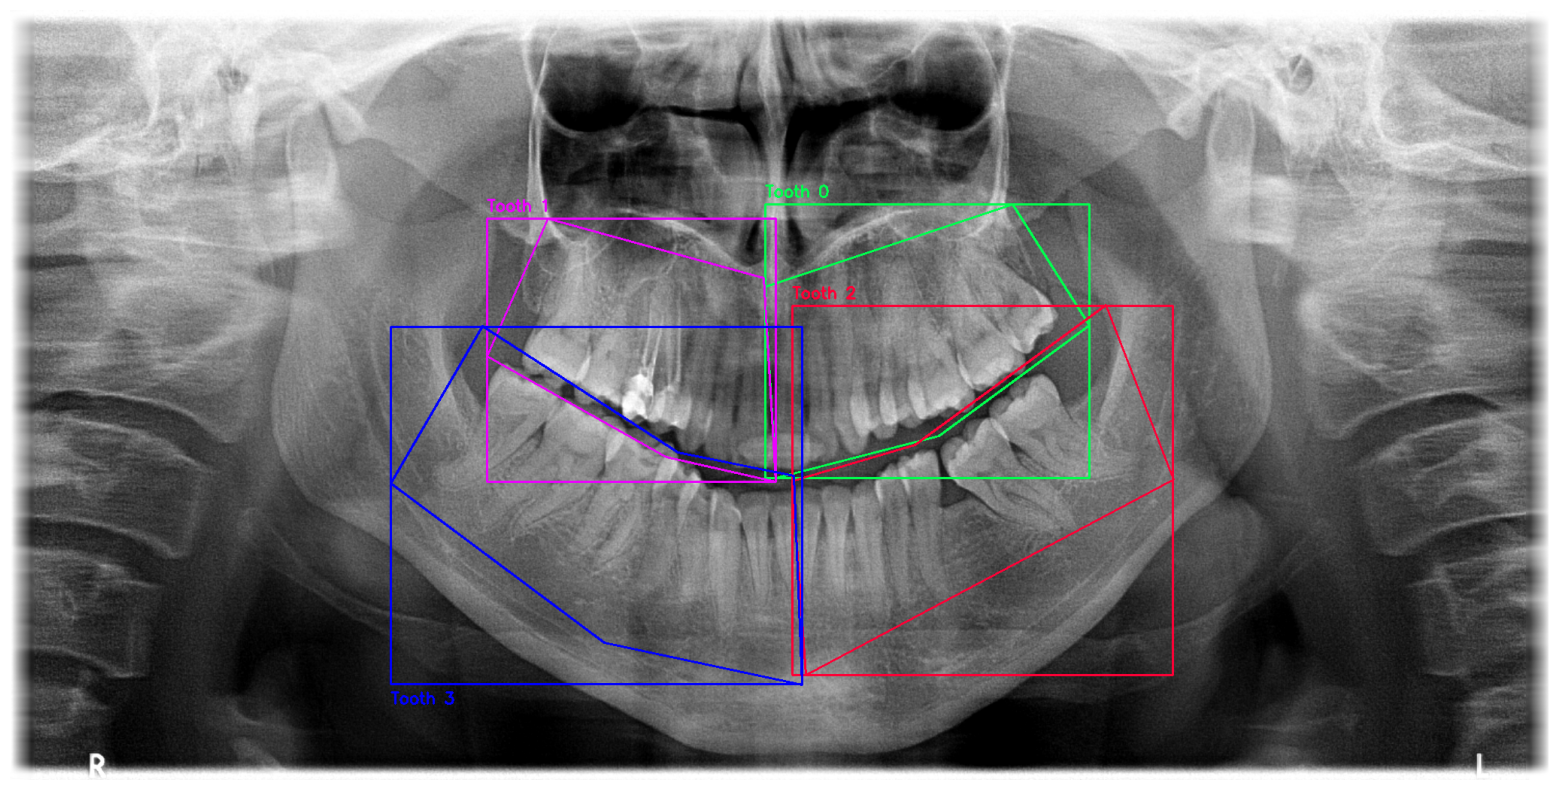

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_1024.json"
image_folder = "drive/MyDrive/training_data/quadrant/xrays_2048_1024"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


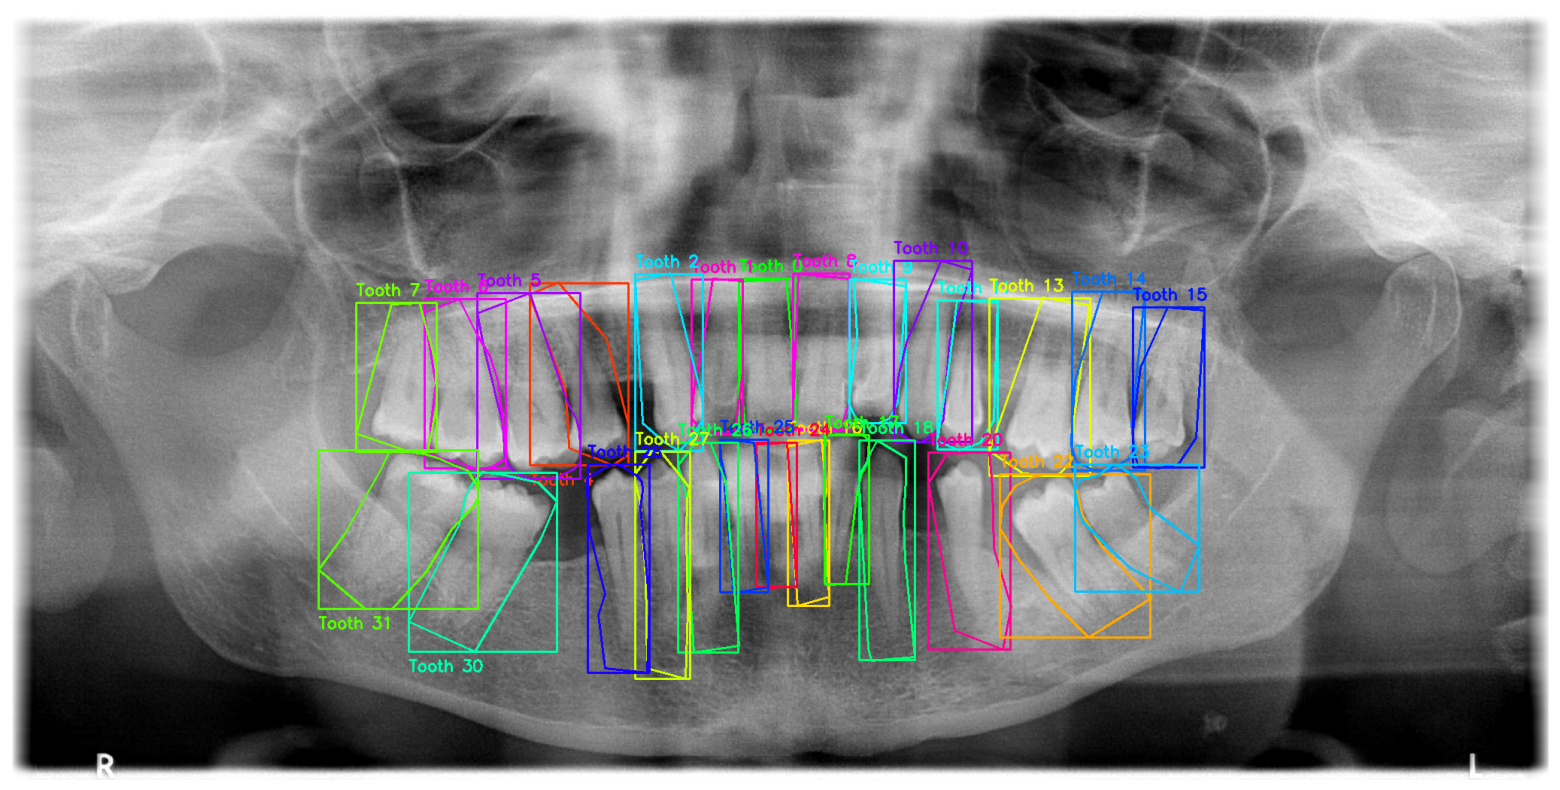

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_1024.json"
image_folder = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_1024"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


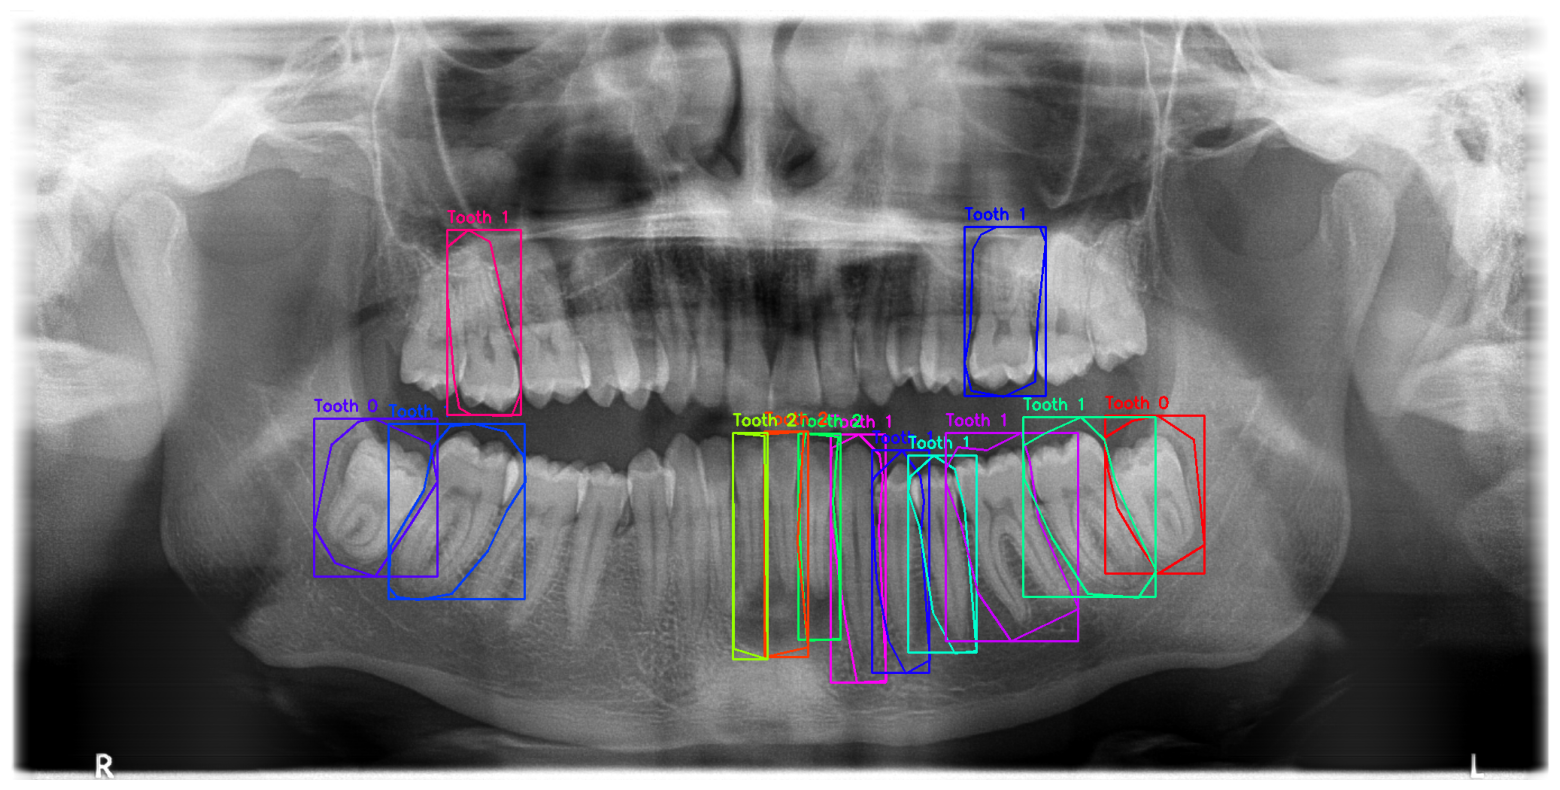

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_1024.json"
image_folder = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_1024"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


# Create Square Images with padding

In [ ]:
#Function to create square images

def pad_to_square_images(input_dir, output_dir):
    """
    Pad rectangular images to create square images (2048x2048).

    Args:
        input_dir (str): Directory containing the input images (2048x1024).
        output_dir (str): Directory to save the padded images (2048x2048).
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    target_size = 2048  # Target square size

    for file_name in os.listdir(input_dir):
        if file_name.endswith(".png"):  # Process only PNG files
            input_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, file_name)

            try:
                with Image.open(input_path) as img:
                    # Ensure the input image is 2048x1024
                    if img.size != (2048, 1024):
                        raise ValueError(f"Image {file_name} has unexpected size {img.size}. Expected (2048, 1024).")

                    # Calculate padding: add equal padding on top and bottom
                    padding = (0, 512, 0, 512)  # (left, top, right, bottom)

                    # Add padding
                    padded_img = ImageOps.expand(img, border=padding, fill="black")

                    # Save the padded image
                    padded_img.save(output_path)
                    print(f"Padded and saved: {file_name}")
            except Exception as e:
                print(f"Failed to process {file_name}: {e}")




In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Square images

#### quadrant directory

# source_dir = "drive/MyDrive/training_data/quadrant/xrays_2048_1024"
# output_dir = "drive/MyDrive/training_data/quadrant/xrays_2048_2028" #typo here, I manually renamed in google drive
# pad_to_square_images(source_dir, output_dir)

Padded and saved: train_1.png
Padded and saved: train_0.png
Padded and saved: train_100.png
Padded and saved: train_103.png
Padded and saved: train_10.png
Padded and saved: train_101.png
Padded and saved: train_102.png
Padded and saved: train_108.png
Padded and saved: train_106.png
Padded and saved: train_104.png
Padded and saved: train_107.png
Padded and saved: train_105.png
Padded and saved: train_112.png
Padded and saved: train_110.png
Padded and saved: train_109.png
Padded and saved: train_11.png
Padded and saved: train_111.png
Padded and saved: train_115.png
Padded and saved: train_116.png
Padded and saved: train_114.png
Padded and saved: train_113.png
Padded and saved: train_117.png
Padded and saved: train_119.png
Padded and saved: train_118.png
Padded and saved: train_122.png
Padded and saved: train_120.png
Padded and saved: train_12.png
Padded and saved: train_121.png
Padded and saved: train_126.png
Padded and saved: train_124.png
Padded and saved: train_125.png
Padded and save

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant/xrays_2048_2048"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 2048): 693 images


In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Square images

#### quadrant_enumeration directory

# source_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_1024"
# output_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048"
# pad_to_square_images(source_dir, output_dir)

Padded and saved: train_10.png
Padded and saved: train_1.png
Padded and saved: train_0.png
Padded and saved: train_101.png
Padded and saved: train_103.png
Padded and saved: train_104.png
Padded and saved: train_100.png
Padded and saved: train_102.png
Padded and saved: train_108.png
Padded and saved: train_11.png
Padded and saved: train_107.png
Padded and saved: train_105.png
Padded and saved: train_106.png
Padded and saved: train_109.png
Padded and saved: train_113.png
Padded and saved: train_115.png
Padded and saved: train_112.png
Padded and saved: train_111.png
Padded and saved: train_110.png
Padded and saved: train_114.png
Padded and saved: train_116.png
Padded and saved: train_118.png
Padded and saved: train_117.png
Padded and saved: train_119.png
Padded and saved: train_12.png
Padded and saved: train_122.png
Padded and saved: train_121.png
Padded and saved: train_124.png
Padded and saved: train_123.png
Padded and saved: train_120.png
Padded and saved: train_127.png
Padded and save

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 2048): 634 images


In [ ]:
########### WARNING ##############
# This code block modifies data in google drive
# should only be run one time
### Square images

#### quadrant-enumeration-disease directory

# source_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_1024"
# output_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_2048"
# pad_to_square_images(source_dir, output_dir)

Padded and saved: train_100.png
Padded and saved: train_1.png
Padded and saved: train_0.png
Padded and saved: train_10.png
Padded and saved: train_101.png
Padded and saved: train_102.png
Padded and saved: train_105.png
Padded and saved: train_103.png
Padded and saved: train_104.png
Padded and saved: train_108.png
Padded and saved: train_109.png
Padded and saved: train_106.png
Padded and saved: train_107.png
Padded and saved: train_11.png
Padded and saved: train_113.png
Padded and saved: train_114.png
Padded and saved: train_110.png
Padded and saved: train_112.png
Padded and saved: train_111.png
Padded and saved: train_116.png
Padded and saved: train_118.png
Padded and saved: train_117.png
Padded and saved: train_115.png
Padded and saved: train_12.png
Padded and saved: train_120.png
Padded and saved: train_119.png
Padded and saved: train_121.png
Padded and saved: train_122.png
Padded and saved: train_126.png
Padded and saved: train_124.png
Padded and saved: train_125.png
Padded and save

In [ ]:
# verify results

image_folder = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_2048"
size_counts = get_image_size_counts(image_folder)

# Print counts
print("Image size counts:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")

Image size counts:
Size (2048, 2048): 705 images


# Create New COCO formatted JSON file for 2048 images

In [ ]:
def transform_to_square(input_json, output_json):
    """
    Transform COCO JSON annotations to account for padding when converting
    rectangular images (2048x1024) to square images (2048x2048).

    Args:
        input_json (str): Path to the input COCO JSON file for rectangular images.
        output_json (str): Path to save the transformed COCO JSON file for square images.
    """
    padding_top = 512  # Padding added to the top (2048x1024 -> 2048x2048)

    with open(input_json, "r") as f:
        data = json.load(f)

    # Transform annotations
    for annotation in data["annotations"]:
        # Adjust bounding box
        if "bbox" in annotation:
            bbox = annotation["bbox"]
            annotation["bbox"] = [
                bbox[0],                      # x_min (unchanged)
                bbox[1] + padding_top,        # y_min (shifted down by padding)
                bbox[2],                      # width (unchanged)
                bbox[3]                       # height (unchanged)
            ]

        # Adjust segmentation
        if "segmentation" in annotation:
            annotation["segmentation"] = [
                [
                    coord if i % 2 == 0 else coord + padding_top
                    for i, coord in enumerate(segment)
                ]
                for segment in annotation["segmentation"]
            ]

    # Update image dimensions in the metadata
    for image in data["images"]:
        image["width"] = 2048  # New square width
        image["height"] = 2048  # New square height

    # Save transformed JSON
    with open(output_json, "w") as f:
        json.dump(data, f)
    print(f"Transformed JSON saved to {output_json}")


In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_1024.json"
# output_json = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_2048.json"

# transform_to_square(input_json=input_json, output_json=output_json)

Transformed JSON saved to drive/MyDrive/training_data/quadrant/coco_quadrant_2048_2048.json


In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_1024.json"
# output_json = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_2048.json"

# transform_to_square(input_json=input_json, output_json=output_json)

Transformed JSON saved to drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_2048.json


In [ ]:
####### WARNING ##########
# writes to drive, should only be run once
# input_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_1024.json"
# output_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_2048.json"

# transform_to_square(input_json=input_json, output_json=output_json)

Transformed JSON saved to drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_2048.json


### Validate Square image and CODO metadata qualitatively

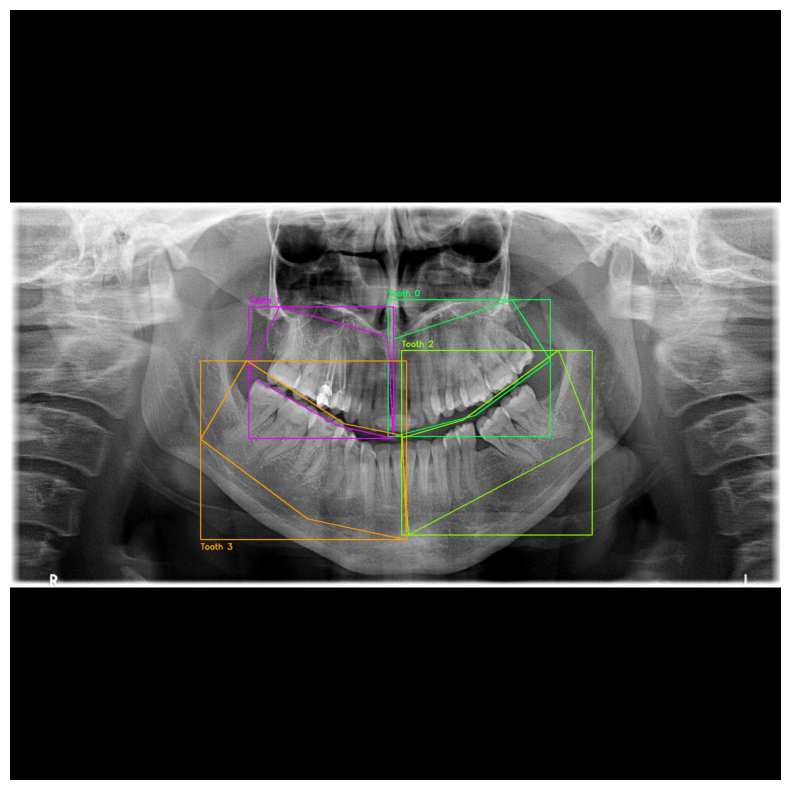

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_2048.json"
image_folder = "drive/MyDrive/training_data/quadrant/xrays_2048_2048"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


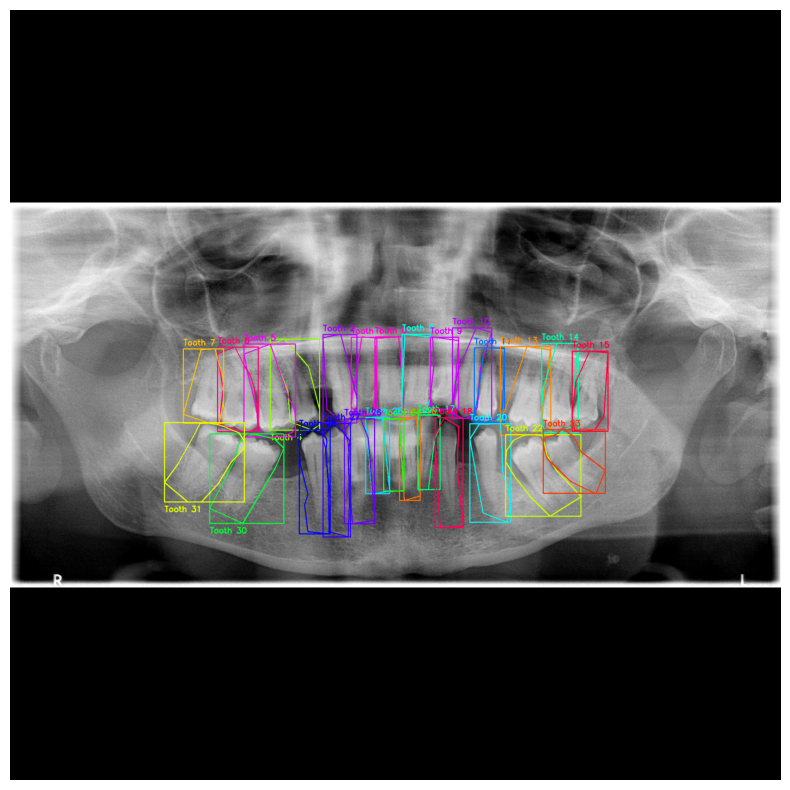

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_2048.json"
image_folder = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


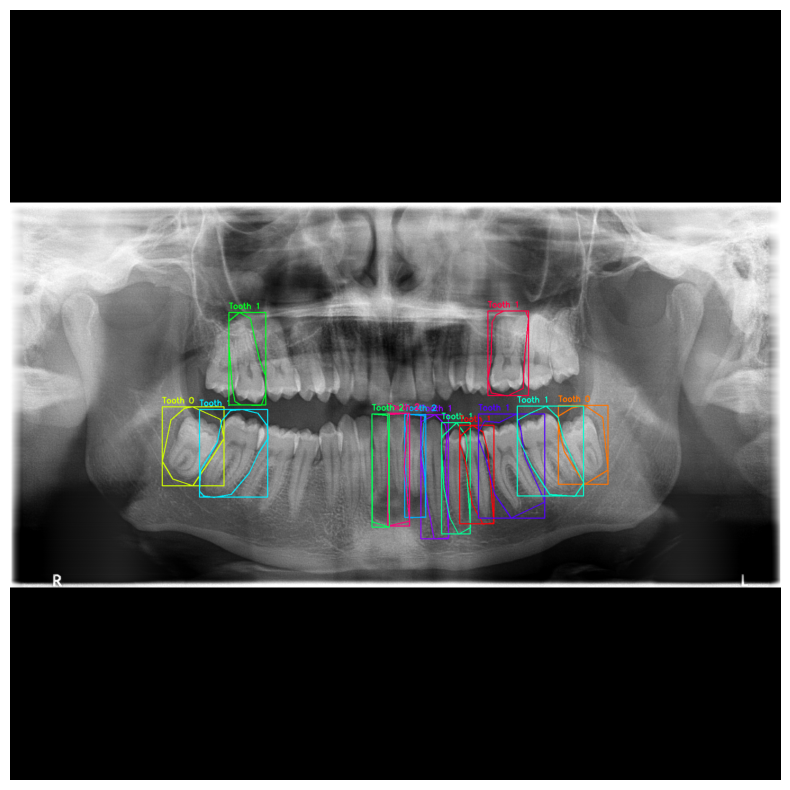

In [ ]:
json_path = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_2048.json"
image_folder = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_2048"

# show an example xray with segmentation and bbox annotations

image_id = 1

annotated_image = visualize_annotations(json_path, image_folder, image_id)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


# YOLO formatting for square images

In [ ]:
# create YOLO formatted files
# one .txt file for each image
# # containts list of bounding boxes
# # classes.txt includes names for 0-indexed classes




def save_classes_file(output_dir, class_labels):
    """
    Save the YOLO classes.txt file.

    Args:
        output_dir (str): Directory to save the classes.txt file.
        class_labels (list): List of class labels for YOLO.
    """
    output_file = os.path.join(output_dir, "classes.txt")
    with open(output_file, "w") as f:
        for label in class_labels:
            f.write(f"{label}\n")
    print(f"Classes file saved to {output_file}")


def coco_to_yolo(coco_json, output_dir, class_labels, image_size=(2048, 2048)):
    """
    Convert COCO JSON annotations to YOLO format.

    Args:
        coco_json (str): Path to the COCO JSON file for square images.
        output_dir (str): Directory to save YOLO `.txt` files.
        class_labels (list): List of class labels for YOLO.
        image_size (tuple): Image dimensions (width, height), default is (2048, 2048).
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    try:
        with open(coco_json, "r") as f:
            data = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error reading COCO JSON file: {e}")
        return

    img_id_to_file = {img["id"]: img["file_name"] for img in data["images"]}
    width, height = image_size

    processed_images = set()

    # Process annotations
    for annotation in data["annotations"]:
        # Extract relevant data
        image_id = annotation["image_id"]
        class_id = annotation.get("category_id")  # Use category_id for YOLO class_id
        bbox = annotation.get("bbox")  # [x_min, y_min, bbox_width, bbox_height]

        if class_id is None or bbox is None:
            print(f"Skipped annotation: {annotation.get('id', 'unknown')} (missing class_id or bbox)")
            continue  # Skip if class_id or bbox is missing

        # Convert bbox to YOLO format: [x_center, y_center, width, height]
        x_center = (bbox[0] + bbox[2] / 2) / width
        y_center = (bbox[1] + bbox[3] / 2) / height
        bbox_width = bbox[2] / width
        bbox_height = bbox[3] / height

        # YOLO annotation line
        yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n"

        # Write to corresponding YOLO file
        image_file = img_id_to_file[image_id]
        yolo_file = os.path.join(output_dir, os.path.splitext(image_file)[0] + ".txt")

        with open(yolo_file, "a") as f:
            f.write(yolo_line)

        processed_images.add(image_id)

    # Create empty .txt files for images with no annotations
    for image_id, file_name in img_id_to_file.items():
        if image_id not in processed_images:
            yolo_file = os.path.join(output_dir, os.path.splitext(file_name)[0] + ".txt")
            open(yolo_file, "w").close()  # Create an empty file

    print(f"YOLO annotations saved to {output_dir}")

    # Save the classes file
    save_classes_file(output_dir, class_labels)


In [ ]:
######### YOLO Quadrant

class_labels = [
    "Quadrant 1",
    "Quadrant 2",
    "Quadrant 3",
    "Quadrant 4"
]

coco_json = "drive/MyDrive/training_data/quadrant/coco_quadrant_2048_2048.json"
output_dir = "drive/MyDrive/training_data/quadrant/yolo_2048_2048/"


# ####### WARNING ##########
# # writes to drive, should only be run once
# coco_to_yolo(
#     coco_json=coco_json,
#     output_dir=output_dir,
#     class_labels=class_labels
# )

YOLO annotations saved to drive/MyDrive/training_data/quadrant/yolo_2048_2048/
Classes file saved to drive/MyDrive/training_data/quadrant/yolo_2048_2048/classes.txt


In [ ]:

######### YOLO Quadrant Enumeration


class_labels = [
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "31",
    "32",
    "33",
    "34",
    "35",
    "36",
    "37",
    "38",
    "41",
    "42",
    "43",
    "44",
    "45",
    "46",
    "47",
    "48"
]

coco_json = "drive/MyDrive/training_data/quadrant_enumeration/coco_quadrant_enumeration_2048_2048.json"
output_dir = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/"


# ####### WARNING ##########
# # writes to drive, should only be run once
# coco_to_yolo(
#     coco_json=coco_json,
#     output_dir=output_dir,
#     class_labels=class_labels
# )

YOLO annotations saved to drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/
Classes file saved to drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/classes.txt


In [ ]:
######### YOLO Quadrant Enumeration Disease


class_labels = [
    "Impacted",
    "Caries",
    "Periapical Lesion",
    "Deep Caries"
]

coco_json = "drive/MyDrive/training_data/quadrant-enumeration-disease/coco_quadrant_enumeration_disease_2048_2048.json"
output_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/"


# ####### WARNING ##########
# # writes to drive, should only be run once
# coco_to_yolo(
#     coco_json=coco_json,
#     output_dir=output_dir,
#     class_labels=class_labels
# )

YOLO annotations saved to drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/
Classes file saved to drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/classes.txt


## Qualitative Evaluation of YOLO data

In [ ]:


def visualize_yolo(image_name, image_dir, yolo_dir, classes_file, image_size=(2048, 2048)):
    """
    Visualize YOLO annotations on an image.

    Args:
        image_name (str): Name of the image file (e.g., "train_0").
        image_dir (str): Directory containing the images.
        yolo_dir (str): Directory containing YOLO `.txt` files.
        classes_file (str): Path to the `classes.txt` file containing class labels.
        image_size (tuple): Image dimensions (width, height), default is (2048, 2048).
    """
    # Load the class labels
    try:
        with open(classes_file, "r") as f:
            class_labels = [line.strip() for line in f.readlines()]
    except FileNotFoundError:
        print(f"Classes file not found: {classes_file}")
        return

    # Paths to the image and YOLO annotation file
    image_path = os.path.join(image_dir, f"{image_name}.png")
    yolo_path = os.path.join(yolo_dir, f"{image_name}.txt")

    # Read the image
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read YOLO annotations
    if not os.path.exists(yolo_path):
        print(f"YOLO annotation file not found: {yolo_path}")
        return
    with open(yolo_path, "r") as f:
        yolo_annotations = f.readlines()

    # Overlay bounding boxes and labels
    for annotation in yolo_annotations:
        parts = annotation.strip().split()
        if len(parts) != 5:
            print(f"Invalid YOLO annotation format in file: {yolo_path}")
            continue

        class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts)
        class_id = int(class_id)

        # Convert YOLO format to image coordinates
        x_center *= image_size[0]
        y_center *= image_size[1]
        bbox_width *= image_size[0]
        bbox_height *= image_size[1]

        x_min = int(x_center - bbox_width / 2)
        y_min = int(y_center - bbox_height / 2)
        x_max = int(x_center + bbox_width / 2)
        y_max = int(y_center + bbox_height / 2)

        # Draw bounding box
        color = (0, 255, 0)  # Green for bounding boxes
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)

        # Annotate with class label
        label = class_labels[class_id] if class_id < len(class_labels) else f"Class {class_id}"
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"YOLO Annotations for {image_name}")
    plt.show()


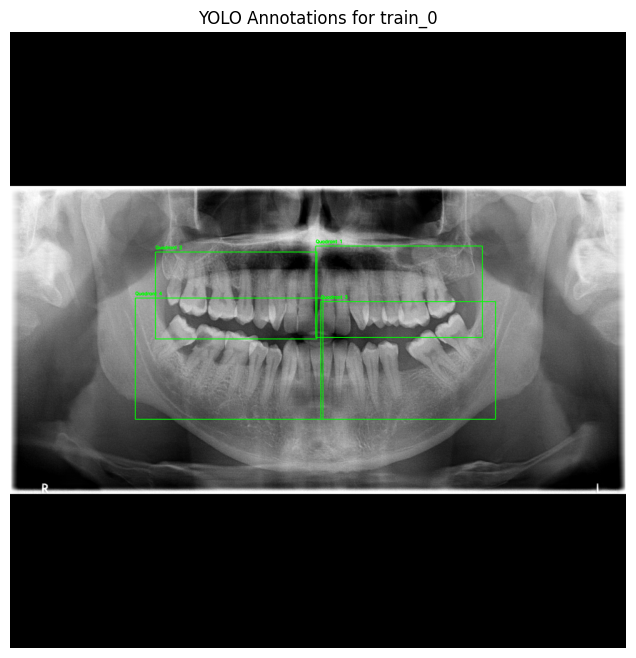

In [ ]:
# quadrant

image_name = "train_0"
image_dir = "drive/MyDrive/training_data/quadrant/xrays_2048_2048"
yolo_dir = "drive/MyDrive/training_data/quadrant/yolo_2048_2048"
classes_file = "drive/MyDrive/training_data/quadrant/yolo_2048_2048/classes.txt"

visualize_yolo(image_name, image_dir, yolo_dir, classes_file)


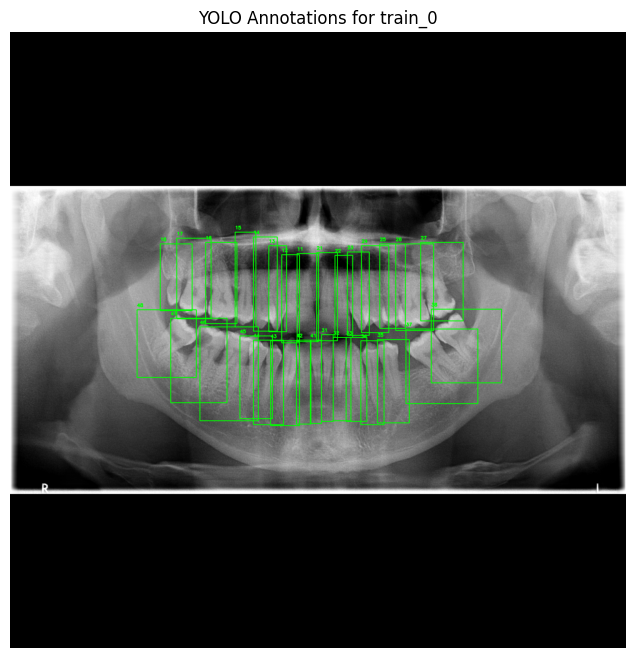

In [ ]:
# quadrant enumeration

image_name = "train_0"
image_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048"
yolo_dir = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048"
classes_file = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/classes.txt"

visualize_yolo(image_name, image_dir, yolo_dir, classes_file)


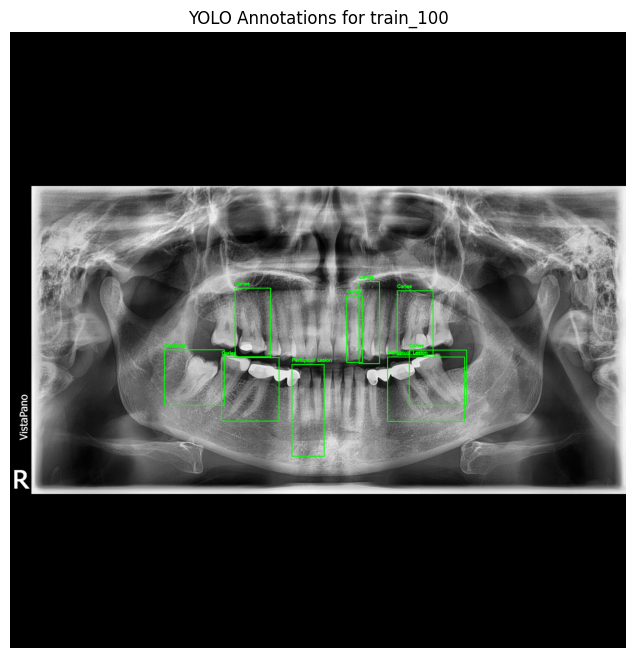

In [ ]:
# quadrant enumeration

image_name = "train_100"
image_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_2048"
yolo_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048"
classes_file = "drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/classes.txt"

visualize_yolo(image_name, image_dir, yolo_dir, classes_file)


 # Reorganize YOLO directories

In [5]:
import os
import random
import shutil

def organize_yolo_data(yolo_dir, image_dir, train_ratio=0.8, random_seed=42):
    """
    Organizes YOLO data into train/val split with appropriate directories.

    Args:
        yolo_dir (str): Path to the YOLO dataset directory containing .txt files and images.
        train_ratio (float): Ratio of data to be used for training. Default is 80% training.
        random_seed (int): Seed for random split. Default is 42.

    """
    # Set random seed for reproducibility
    random.seed(random_seed)

    # Paths
    train_dir = os.path.join(yolo_dir, "train")
    val_dir = os.path.join(yolo_dir, "val")
    train_images_dir = os.path.join(train_dir, "images")
    train_labels_dir = os.path.join(train_dir, "labels")
    val_images_dir = os.path.join(val_dir, "images")
    val_labels_dir = os.path.join(val_dir, "labels")

    # Create directories
    for path in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
        os.makedirs(path, exist_ok=True)

    # Get list of all .txt files (label files)
    label_files = [f for f in os.listdir(yolo_dir) if f.endswith(".txt") and f != "classes.txt"]

    # Split files into train and val
    random.shuffle(label_files)
    split_idx = int(len(label_files) * train_ratio)
    train_files = label_files[:split_idx]
    val_files = label_files[split_idx:]

    # Move files into train/val directories
    for file_list, image_dest, label_dest in [
        (train_files, train_images_dir, train_labels_dir),
        (val_files, val_images_dir, val_labels_dir),
    ]:
        for label_file in file_list:
            # Move label file
            src_label_path = os.path.join(yolo_dir, label_file)
            dst_label_path = os.path.join(label_dest, label_file)
            shutil.move(src_label_path, dst_label_path)

            # Move corresponding image file
            image_file = label_file.replace(".txt", ".png")
            src_image_path = os.path.join(image_dir, image_file)
            dst_image_path = os.path.join(image_dest, image_file)
            if os.path.exists(src_image_path):  # Ensure the image exists
                shutil.copy(src_image_path, dst_image_path)

    # Copy classes.txt to train and val directories
    classes_file = os.path.join(yolo_dir, "classes.txt")
    if os.path.exists(classes_file):
        shutil.copy(classes_file, train_labels_dir)
        shutil.copy(classes_file, val_labels_dir)

    print("Data organized successfully!")
    print(f"Training data: {len(train_files)} files")
    print(f"Validation data: {len(val_files)} files")


In [ ]:
# Quadrant Enumeration Dataset
# yolo_dir = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048"
# image_dir = "drive/MyDrive/training_data/quadrant_enumeration/xrays_2048_2048"
# organize_yolo_data(yolo_dir, image_dir)

Data organized successfully!
Training data: 507 files
Validation data: 127 files


In [7]:
import os

def create_yaml_file(output_path, train_dir, val_dir, classes_file):
    """
    Creates a YOLO-compatible YAML file for training configuration.

    Args:
        output_path (str): Path to save the generated YAML file.
        train_dir (str): Path to the directory containing training data (images/labels).
        val_dir (str): Path to the directory containing validation data (images/labels).
        classes_file (str): Path to the `classes.txt` file containing class names.

    Returns:
        None. Writes the YAML file to the specified output path.
    """
    # Read class names from classes.txt
    with open(classes_file, "r") as f:
        class_names = [line.strip() for line in f.readlines()]

    # Prepare YAML content
    yaml_content = f"""# YOLOv8 data configuration
path: .
train: {train_dir}
val: {val_dir}

# Number of classes
nc: {len(class_names)}

# Class names
names: {class_names}
"""

    # Save YAML content to file
    with open(output_path, "w") as yaml_file:
        yaml_file.write(yaml_content)

    print(f"YAML file saved to {output_path}")



# Example usage
# yolo_base_dir = "drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048"
# train_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/train/images"
# val_dir = "/content/drive/MyDrive/training_data/quadrant_enumeration/yolo_2048_2048/val/images"
# classes_file = os.path.join(yolo_base_dir, "classes.txt")
# output_yaml = os.path.join(yolo_base_dir, "data.yaml")

# create_yaml_file(output_yaml, train_dir, val_dir, classes_file)


In [6]:
# Quadrant Enumeration Dataset
yolo_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048"
image_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/xrays_2048_2048"
organize_yolo_data(yolo_dir, image_dir)

Data organized successfully!
Training data: 564 files
Validation data: 141 files


In [8]:
yolo_base_dir = "drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048"
train_dir = "/content/drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/train/images"
val_dir = "/content/drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/val/images"
classes_file = os.path.join(yolo_base_dir, "classes.txt")
output_yaml = os.path.join(yolo_base_dir, "data.yaml")

create_yaml_file(output_yaml, train_dir, val_dir, classes_file)

YAML file saved to drive/MyDrive/training_data/quadrant-enumeration-disease/yolo_2048_2048/data.yaml
